In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
Import pandas as pd

SyntaxError: invalid syntax (<ipython-input-3-0abd4703bd29>, line 2)

In [ ]:
ial Data:")# Load the dataset
file_path = '/content/Tingkat Pengangguran Terbuka Menurut Provinsi, 2024.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Init")
print(data.head())

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-5-bd4cd487db8d>, line 1)

# Preprocessing

In [ ]:
# Remove the first three rows which are not needed
 = data.drop([0, 1, 2])
data_cleaned
# Reset the index after dropping rows
data_cleaned.reset_index(drop=True, inplace=True)

# Rename the columns to something more meaningful
data_cleaned.columns = ['Province', 'Feb_Unemploymebnt_Rate', 'Aug_Unemployment_Rate']

# Drop any rows with NaN values in the 'Province' column
data_cleaned.dropna(subset=['Province'], inplace=True)

In [ ]:
# Convert the unemployment rate columns to numeric values
data_cleaned['Feb_Unemployment_Rate'] = pd.to_numeric(data_cleaned['Feb_Unemployment_Rate'], errors='coerce')
data_cleaned['Aug_Unemployment_Rate'] = pd.to_numeric(data_cleaned['Aug_Unemployment_Rate'], errors='coerce')

In [ ]:
# Display the cleaned data
print("\nCleaned Data:")
print(data_cleaned.head())


Cleaned Data:
         Province  Feb_Unemployment_Rate  Aug_Unemployment_Rate
0            ACEH                   5.56                    NaN
1  SUMATERA UTARA                   5.10                    NaN
2  SUMATERA BARAT                   5.79                    NaN
3            RIAU                   3.85                    NaN
4           JAMBI                   4.45                    NaN


In [ ]:
# Descriptive statistics for February and August unemployment rates
descriptive_stats = data_cleaned.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Provinces with the highest and lowest unemployment rates in February
highest_feb = data_cleaned.nlargest(5, 'Feb_Unemployment_Rate')[['Province', 'Feb_Unemployment_Rate']]
lowest_feb = data_cleaned.nsmallest(5, 'Feb_Unemployment_Rate')[['Province', 'Feb_Unemployment_Rate']]

print("\nHighest February Unemployment Rates:")
print(highest_feb)

print("\nLowest February Unemployment Rates:")
print(lowest_feb)



Descriptive Statistics:
       Feb_Unemployment_Rate  Aug_Unemployment_Rate
count              39.000000                    0.0
mean                4.379744                    NaN
std                 1.385797                    NaN
min                 1.180000                    NaN
25%                 3.270000                    NaN
50%                 4.160000                    NaN
75%                 5.655000                    NaN
max                 7.020000                    NaN

Highest February Unemployment Rates:
            Province  Feb_Unemployment_Rate
15            BANTEN                   7.02
9          KEP. RIAU                   6.94
11        JAWA BARAT                   6.91
10       DKI JAKARTA                   6.03
33  PAPUA BARAT DAYA                   6.02

Lowest February Unemployment Rates:
            Province  Feb_Unemployment_Rate
37  PAPUA PEGUNUNGAN                   1.18
16              BALI                   1.87
36      PAPUA TENGAH                

In [ ]:
# Provinces with the highest and lowest unemployment rates in August
# As the August data has many missing values, we filter out the NaNs first
highest_aug = data_cleaned.dropna(subset=['Aug_Unemployment_Rate']).nlargest(5, 'Aug_Unemployment_Rate')[['Province', 'Aug_Unemployment_Rate']]
lowest_aug = data_cleaned.dropna(subset=['Aug_Unemployment_Rate']).nsmallest(5, 'Aug_Unemployment_Rate')[['Province', 'Aug_Unemployment_Rate']]

print("\nHighest August Unemployment Rates:")
print(highest_aug)

print("\nLowest August Unemployment Rates:")
print(lowest_aug)


Highest August Unemployment Rates:
Empty DataFrame
Columns: [Province, Aug_Unemployment_Rate]
Index: []

Lowest August Unemployment Rates:
Empty DataFrame
Columns: [Province, Aug_Unemployment_Rate]
Index: []


In [ ]:
import matplotlib.pyplot as plt

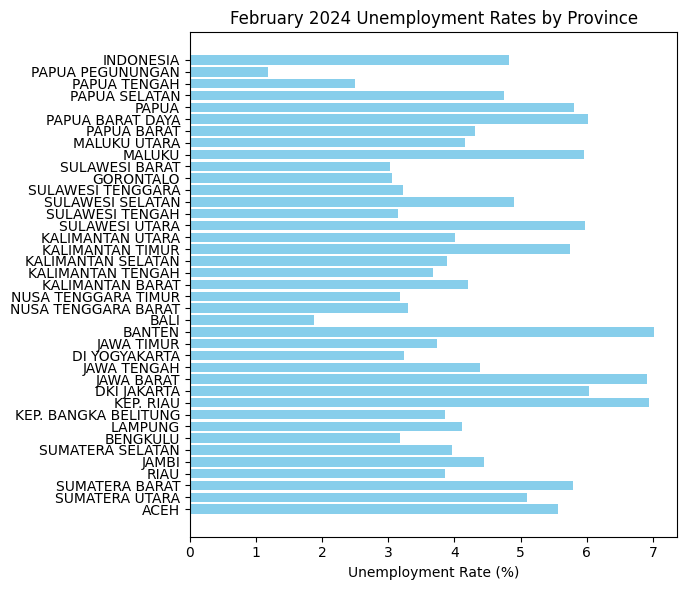

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 6))

# February Unemployment Rates
plt.subplot(1, 2, 1)
plt.barh(data_cleaned['Province'], data_cleaned['Feb_Unemployment_Rate'], color='skyblue')
plt.xlabel('Unemployment Rate (%)')
plt.title('February 2024 Unemployment Rates by Province')

# August Unemployment Rates (only if data is available)
if not data_cleaned['Aug_Unemployment_Rate'].isna().all():
    plt.subplot(1, 2, 2)
    plt.barh(data_cleaned['Province'], data_cleaned['Aug_Unemployment_Rate'], color='lightgreen')
    plt.xlabel('Unemployment Rate (%)')
    plt.title('August 2024 Unemployment Rates by Province')

plt.tight_layout()
plt.show()